In [39]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras import utils
import warnings 
# Part-1 - Initialising the CNN and compiling the model
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
# Part 2 - Create train and test ImageDataGenerator via 'flow_from_directory' 

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
print(train_datagen)

training_set = train_datagen.flow_from_directory('C:/Users/759987/TrainCatDog',
                                                 target_size = (128, 128), batch_size = 32, class_mode = 'binary')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/759987/TestCatDog', target_size = (128, 128), 
                                            batch_size = 32, class_mode = 'binary')


Found 24046 images belonging to 2 classes.
Found 950 images belonging to 2 classes.


In [55]:
# Part 3 - Fitting the CNN to the images. Train the Model on Training images. For validation, used Test Images

classifier.fit_generator(training_set, steps_per_epoch = 8000, epochs = 5,
                         validation_data = test_set, validation_steps = 2000)
print(classifier)

Epoch 1/5
8000/8000 [==============================] - 3524s 440ms/step - loss: 0.4673 - acc: 0.7771 - val_loss: 0.5083 - val_acc: 0.7822
Epoch 2/5
8000/8000 [==============================] - 3442s 430ms/step - loss: 0.3572 - acc: 0.8407 - val_loss: 0.5017 - val_acc: 0.7769
Epoch 3/5
8000/8000 [==============================] - 3425s 428ms/step - loss: 0.2832 - acc: 0.8793 - val_loss: 0.6148 - val_acc: 0.7737
Epoch 4/5
8000/8000 [==============================] - 4196s 525ms/step - loss: 0.2325 - acc: 0.9042 - val_loss: 0.6364 - val_acc: 0.7884
Epoch 5/5
8000/8000 [==============================] - 7464s 933ms/step - loss: 0.1944 - acc: 0.9228 - val_loss: 0.7664 - val_acc: 0.7916


In [56]:
# Part 5- save model file and model weights 
classifier.save("classifier.model1")
classifier.save_weights("classifier.model2")
print("Saved classifier model to disk")
# Part 6-  serialize model to JSON
classifier_json = classifier.to_json()

with open("classifier.json", "w") as json_file:
    json_file.write(classifier_json)

# Part 7- Load the model file and used it for prediction on test image.
classnames = ["cat", "dog"]
model = load_model('classifier.model1')

Saved classifier model to disk


W0303 16:17:15.533054 284060 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


[[1.]]
AxesImage(10.8,27.8;410.4x246.249)
It is a : dog


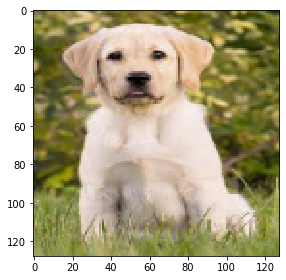

In [79]:
#First pic 
import skimage.io 
import skimage.segmentation
# Part 4 - Making new predictions for single image which is loaded from local folder

test_image = image.load_img('Downloads/secondDog.jpg', target_size = (128, 128))
#test_image = skimage.io.imread("https://arteagac.github.io/blog/lime_image/img/cat-and-dog.jpg")
test_image = image.img_to_array(test_image)
#print("test image1:", test_image)
test_image = np.expand_dims(test_image, axis = 0)
#print("test image2:", test_image)


result = classifier.predict(test_image)
print(result)
#training_set.class_indices
Xi = skimage.io.imread("C:/Users/759987/Downloads/secondDog.jpg")
Xi = skimage.transform.resize(Xi, (128,128)) 
Xi = (Xi - 0.5)*2 #Inception pre-processing
print(skimage.io.imshow(Xi/2+0.5)) # Show image before inception preprocessin

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print("It is a :", prediction)



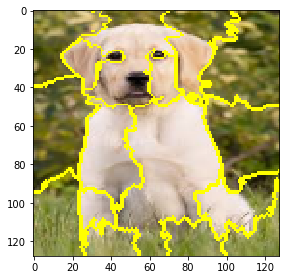

In [72]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))
test_image = image.load_img('Downloads/secondDog.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


[[0.9890843]]
It is a : cat


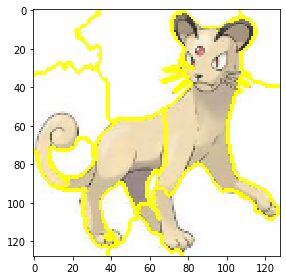

In [59]:
Xi = skimage.io.imread("C:/Users/759987/Downloads/persian.jpg")
Xi = skimage.transform.resize(Xi, (128,128)) 
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessin
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))
test_image = image.load_img('Downloads/persian.jpg', target_size = (128, 128))
#test_image = skimage.io.imread("https://arteagac.github.io/blog/lime_image/img/cat-and-dog.jpg")
test_image = image.img_to_array(test_image)
#print("test image1:", test_image)
test_image = np.expand_dims(test_image, axis = 0)
#print("test image2:", test_image)


result = classifier.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print("It is a :", prediction)

In [85]:
'''
    Perform model evaluation on test data and calculate different performance metrics of a model
'''

# loss is not a percentage. It is a summation of the errors made in training or validation sets.
test_loss, test_acc = model.evaluate(test_set, ["cat","dog"])
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# calculate predictions. comes a as an array of possibilities per photo.
predictions = model.predict(test_images)
# both give same output
pred_prob = model.predict_proba(test_set)

# mapping to single out the top prediction for the image. (ex. image is 20% sock, 10% sneaker, 70% boot. ans = boot )
result = map(lambda v : np.argmax(v), predictions)
prediction_result = np.array(list(result))
print(prediction_result)

# Classification report
classification_report = metrics.classification_report(test_labels, prediction_result, target_names = class_names)
print("Classification report: \n", classification_report)

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels, prediction_result)
print("Confusion matrix: \n",confusion_matrix)

# Classification report metrics.
accuracy_score = metrics.accuracy_score(prediction_result, test_labels) #alt. method of (Test accuracy)"
print("accuracy_score", accuracy_score)
precision_score = metrics.precision_score(prediction_result, test_labels, average='weighted')
print("precision_score", precision_score)
recall_score = metrics.recall_score(prediction_result, test_labels, average='weighted')
print("recall_score", recall_score)
f1_score = metrics.f1_score(test_labels, prediction_result, average='weighted')
print("f1_score", f1_score)

# alt method of (Test loss)
#note that this uses the prediction possibility array. it wont work otherwise
log_loss_score = metrics.log_loss(test_labels, pred_prob)
print("log_loss_score", log_loss_score)


ValueError: `y` argument is not supported when data isa generator or Sequence instance. Instead pass targets as the second element of the generator.

In [ ]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('yourpath/*.gif'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)